# 第10部　統計学と機械学習

## 4章　線形モデルとニューラルネットワーク

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 機械学習法を適用するためのライブラリ
from sklearn.neural_network import MLPRegressor, \
                                   MLPClassifier 
from sklearn.linear_model import LinearRegression, \
                                 LogisticRegression

# サンプルデータの作成
from sklearn.datasets import make_circles

# テストデータと訓練データに分ける
from sklearn.model_selection import train_test_split

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 6

### 実装：単回帰分析

#### データの読み込み

In [3]:
# データの読み込み
beer = pd.read_csv('8-1-1-beer.csv')
print(beer.head(n=3))

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0


#### statsmodelsによるモデル化

In [4]:
# モデルの推定と係数の確認
lm_stats = smf.ols(formula='beer ~ temperature', 
                   data=beer).fit()
lm_stats.params

Intercept      34.610
temperature     0.765
dtype: float64

In [5]:
# 気温20度のときの予測値
lm_stats.predict(pd.DataFrame({'temperature' : [20]}))

0    49.919
dtype: float64

#### sklernによるモデル化

In [6]:
# データの整備
# 入力ベクトル
# reshape(-1, 列数)の形にする
X_beer = beer['temperature'].to_numpy().reshape(-1, 1)
# 目標ベクトル
y_beer = beer['beer'].to_numpy()

In [7]:
# reshapeの結果
X_beer

array([[20.5],
       [25. ],
       [10. ],
       [26.9],
       [15.8],
       [ 4.2],
       [13.5],
       [26. ],
       [23.3],
       [ 8.5],
       [26.2],
       [19.1],
       [24.3],
       [23.3],
       [ 8.4],
       [23.5],
       [13.9],
       [35.5],
       [27.2],
       [20.5],
       [10.2],
       [20.5],
       [21.6],
       [ 7.9],
       [42.2],
       [23.9],
       [36.9],
       [ 8.9],
       [36.4],
       [ 6.4]])

In [8]:
# モデルの推定と係数の確認
lm_sk = LinearRegression().fit(X_beer, y_beer)
print(np.round(lm_sk.intercept_, 3))
print(np.round(lm_sk.coef_, 3))

34.61
[0.765]


In [9]:
# 温度20度のときの予測値
lm_sk.predict(np.array(20).reshape(-1, 1))

array([49.919])

#### モデルの評価

In [10]:
# R2値の計算
pred_lm_all = lm_sk.predict(X_beer)
resid = pred_lm_all - y_beer
ss_t = np.sum((y_beer - np.mean(y_beer))**2)
r2 = 1 - np.sum(resid**2) / ss_t
round(r2, 3)

0.504

In [11]:
# スコアの計算
round(lm_sk.score(X_beer, y_beer), 3)

0.504

### 実装：ニューラルネットワークによる回帰

#### モデルの推定

In [12]:
# モデルの推定と係数の確認
nnet_reg = MLPRegressor(random_state=1,  
                        hidden_layer_sizes=(1, ),
                        activation='identity', alpha=0, 
                        solver='lbfgs', max_iter=500,
                       ).fit(X_beer, y_beer)
print('切片', nnet_reg.intercepts_)
print('係数', nnet_reg.coefs_)

切片 [array([-42.901]), array([25.803])]
係数 [array([[-3.728]]), array([[-0.205]])]


#### 係数の解釈

In [13]:
# ほぼ切片と同じ
nnet_reg.intercepts_[0] * nnet_reg.coefs_[1] + \
    nnet_reg.intercepts_[1]

array([[34.61]])

In [14]:
# ほぼ係数と同じ
nnet_reg.coefs_[0] * nnet_reg.coefs_[1]

array([[0.765]])

#### 予測値の計算

In [15]:
# 気温20度のときの予測値
nnet_reg.predict(np.array(20).reshape(-1, 1))

array([49.919])

In [16]:
# 定義通りに予測値を計算
(nnet_reg.intercepts_[0] + nnet_reg.coefs_[0] * 20) * \
    nnet_reg.coefs_[1] + nnet_reg.intercepts_[1]

array([[49.919]])

#### モデルの評価

In [17]:
# R2
round(nnet_reg.score(X_beer, y_beer), 3)

0.504

### 実装：ロジスティック回帰

#### データの読み込み

In [18]:
# データの読み込み
test_result = pd.read_csv('9-2-1-logistic-regression.csv')
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


#### statsmodelsによるモデル化

In [19]:
# モデルの推定と係数の確認
glm_stats = smf.glm(formula = 'result ~ hours', 
                    data = test_result, 
                    family=sm.families.Binomial()).fit()
glm_stats.params

Intercept   -4.559
hours        0.929
dtype: float64

In [20]:
# 3時間勉強したときの合格率
glm_stats.predict(pd.DataFrame({'hours': [3]}))

0    0.145
dtype: float64

#### sklernによるモデル化

In [21]:
# データの整備
# 入力ベクトル
# reshape(-1, 列数)の形にする
X_bin = test_result['hours'].to_numpy().reshape(-1, 1)
# 目標ベクトル
y_bin = test_result['result'].to_numpy()

In [22]:
# モデルの推定と係数の確認
glm_sk = LogisticRegression(random_state=1, penalty='none'
                           ).fit(X_bin, y_bin)
print(np.round(glm_sk.intercept_, 3))
print(np.round(glm_sk.coef_, 3))

[-4.559]
[[0.929]]


In [23]:
# 3時間勉強したときの合格率
glm_sk.predict_proba(np.array(3).reshape(-1, 1))

array([[0.855, 0.145]])

In [24]:
# 3時間勉強したときの合否
glm_sk.predict(np.array(3).reshape(-1, 1))

array([0], dtype=int64)

#### モデルの評価

In [25]:
# 的中率の計算
np.sum(glm_sk.predict(X_bin) == y_bin) / len(y_bin)

0.84

In [26]:
# 的中率
glm_sk.score(X_bin, y_bin)

0.84

### 実装：ニューラルネットワークによる分類

#### モデルの推定

In [27]:
# モデルの推定と係数の確認
nnet_clf = MLPClassifier(random_state=1, 
                         hidden_layer_sizes=(1, ),
                         activation='identity', alpha=0, 
                         solver='lbfgs', max_iter=500, 
                        ).fit(X_bin, y_bin)
print('切片', nnet_clf.intercepts_)
print('係数', nnet_clf.coefs_)

切片 [array([1.595]), array([-1.195])]
係数 [array([[-0.441]]), array([[-2.109]])]


#### 係数の解釈

In [28]:
# ほぼ切片と同じ
nnet_clf.intercepts_[0] * nnet_clf.coefs_[1] + \
    nnet_clf.intercepts_[1]

array([[-4.559]])

In [29]:
# ほぼ係数と同じ
nnet_clf.coefs_[0] * nnet_clf.coefs_[1]

array([[0.929]])

#### 予測値の計算

In [30]:
# 3時間勉強したときの合格率
nnet_clf.predict_proba(np.array(3).reshape(-1, 1))

array([[0.855, 0.145]])

In [31]:
# 3時間勉強したときの合否
nnet_clf.predict(np.array(3).reshape(-1, 1))

array([0], dtype=int64)

In [32]:
# 定義通りに予測値を計算
tmp = (nnet_clf.intercepts_[0] + nnet_clf.coefs_[0] * 3) * \
    nnet_clf.coefs_[1] + nnet_clf.intercepts_[1]

In [33]:
# ロジスティック関数を適用
1 / (1 + np.exp(-tmp))

array([[0.145]])

#### モデルの評価

In [34]:
# 的中率
nnet_clf.score(X_bin, y_bin)

0.84

### 実装：複雑な分類問題データの作成

In [35]:
X, y = make_circles(
    n_samples=100, noise=0.2, factor=0.5, random_state=1)

In [36]:
# 入力ベクトル
print('行数と列数', X.shape)
print('先頭の3行')
print(X[0:3, ::])

行数と列数 (100, 2)
先頭の3行
[[-0.383 -0.091]
 [-0.021 -0.478]
 [-0.396 -1.289]]


In [37]:
# 目標ベクトル
print('行数と列数', y.shape)
print('先頭の3つのデータ')
print(y[0:3])

行数と列数 (100,)
先頭の3つのデータ
[1 1 0]


<AxesSubplot:>

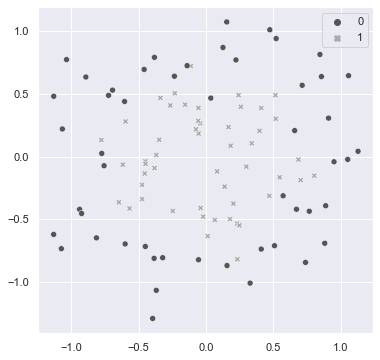

In [38]:
# 可視化
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='gray', style=y)

### 実装：訓練データとテストデータに分割

In [39]:
# データを訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=1)

In [40]:
print('行数と列数　X_train：', X_train.shape)
print('行数と列数　X_test ：', X_test.shape)
print('行数と列数　y_train：', y_train.shape)
print('行数と列数　y_test ：', y_test.shape)

行数と列数　X_train： (75, 2)
行数と列数　X_test ： (25, 2)
行数と列数　y_train： (75,)
行数と列数　y_test ： (25,)


### 実装：複雑なデータに対するロジスティック回帰

In [41]:
circle_glm = LogisticRegression(random_state=0, penalty='none'
                               ).fit(X_train, y_train)

In [42]:
print('訓練　：', round(circle_glm.score(X_train, y_train), 3))
print('テスト：', round(circle_glm.score(X_test, y_test), 3))

訓練　： 0.467
テスト： 0.36


### 実装：複雑なデータに対するニューラルネットワーク

In [43]:
circle_nnet = MLPClassifier(random_state=1, 
                            hidden_layer_sizes=(100, ),
                            activation='relu', alpha=0.5, 
                            solver='lbfgs', max_iter=5000
                           ).fit(X_train, y_train)

In [44]:
# 正答率
print('訓練　：', round(circle_nnet.score(X_train, y_train), 3))
print('テスト：', round(circle_nnet.score(X_test, y_test), 3))

訓練　： 0.96
テスト： 0.88
